In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.style.use(['ggplot'])

In [8]:
df = pd.read_csv("https://cocl.us/datascience_survey_data")
#df= pd.read_csv('Datascience dataset.csv')

In [9]:
df.head()

Unnamed: 0  Very interested  Somewhat interested  \
0   Big Data (Spark / Hadoop)             1332                  729   
1  Data Analysis / Statistics             1688                  444   
2             Data Journalism              429                 1081   
3          Data Visualization             1340                  734   
4               Deep Learning             1263                  770   

   Not interested  
0             127  
1              60  
2             610  
3             102  
4             136

In [10]:
df.set_index('Unnamed: 0', inplace = True)

In [11]:
df.head()

Very interested  Somewhat interested  \
Unnamed: 0                                                         
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   

                            Not interested  
Unnamed: 0                                  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136

In [12]:
df.index.name = None # removing index name 

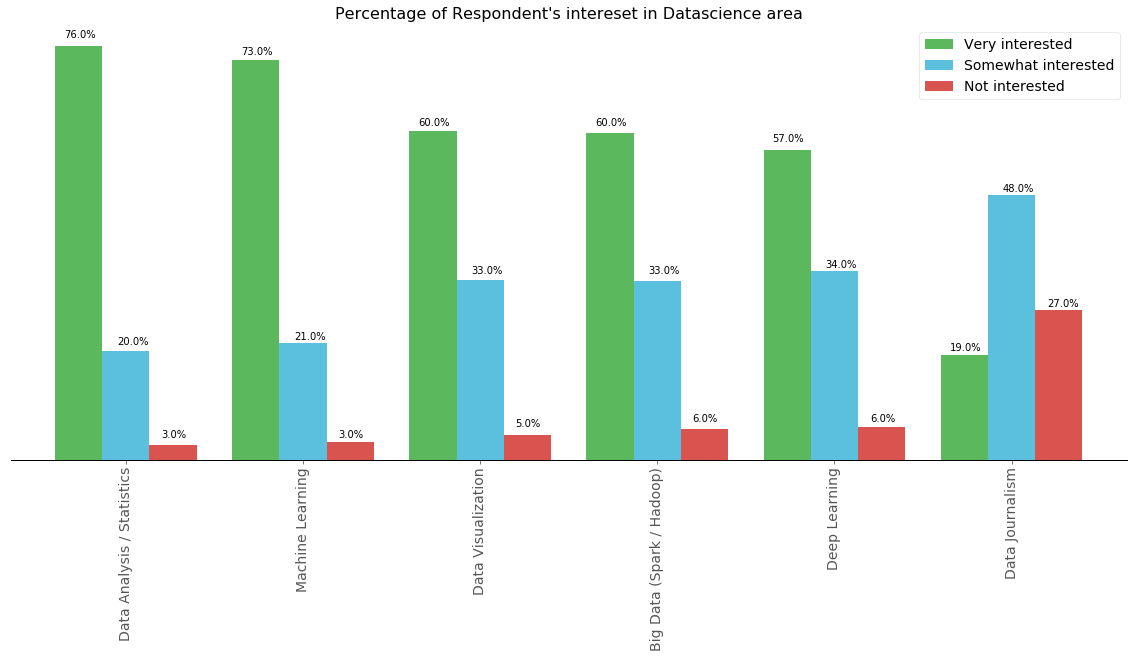

In [13]:
df.sort_values('Very interested', axis = 0, inplace = True, ascending = False)
df2 = df/2233*100 #converting numbers into percentage and making them to dataframe 2
ax = df2.plot(kind = 'bar', figsize = (20,8), width =0.8, color = ['#5cb85c','#5bc0de','#d9534f'])

ax.set_title('Percentage of Respondent\'s intereset in Datascience area', fontsize = 16)
ax.legend(fontsize= 14,facecolor = 'white')
for label in ax.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_fontsize(14)
for label in ax.yaxis.get_ticklabels():
    # label is a Text instance
    label.set_fontsize(14)
ax.set_yticks([])
ax.set_facecolor('white')
ax.spines["bottom"].set_color("black")

#annotate the percentage over bars
i = 0
for row in df2.index.values:
    count = 0
    for col in df2.columns:
        if count == 0:
            a = i-0.35
            count+=1
        plt.annotate(str(round(df2.loc[row,col]))+'%',xy = (a,round(df2.loc[row,col])+1),xycoords = 'data')
        if count == 2:
            a= i+.20
        if count==1:
            a = i-0.05
            count +=1
    i+=1

In [12]:
san_df = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

In [13]:
san_df.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [14]:
crime = pd.DataFrame(san_df['PdDistrict'].value_counts())

In [15]:
crime.head()

PdDistrict
SOUTHERN       28445
NORTHERN       20100
MISSION        19503
CENTRAL        17666
BAYVIEW        14303

In [16]:
crime.reset_index(inplace = True)

In [17]:
crime.columns = ['Neighborhood', 'Count']

In [18]:
crime.head()

Neighborhood  Count
0     SOUTHERN  28445
1     NORTHERN  20100
2      MISSION  19503
3      CENTRAL  17666
4      BAYVIEW  14303

In [19]:
crime

Neighborhood  Count
0     SOUTHERN  28445
1     NORTHERN  20100
2      MISSION  19503
3      CENTRAL  17666
4      BAYVIEW  14303
5    INGLESIDE  11594
6      TARAVAL  11325
7   TENDERLOIN   9942
8     RICHMOND   8922
9         PARK   8699

In [20]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [21]:
# download countries geojson file
!wget --quiet https://cocl.us/sanfran_geojson -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [22]:

import json

with open('san-francisco.geojson') as f:
  data = json.load(f)
# Output: {'name': 'Bob', 'languages': ['English', 'Fench']}
world_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

In [23]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=data,
    data=crime,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map